# Iris Flower Classification

## Problem Statement


- Iris Flower Classification is a classic machine learning task used for
learning and practicing classification algorithms. The dataset contains
features like sepal length, sepal width, petal length, and petal width
for three different species of iris flowers.


- This project involves Reading and Understanding the data
- data visualization
- preparaing the data for modelling
- model selection, and evaluation.
- logistic regression,
- decision trees,
- k-nearest neighbors (KNN),
- support vector machines (SVM)

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [3]:
pd.set_option('display.max_rows' , 500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr',False)

## Read the Dataset

In [4]:
#Read the data
iris = pd.read_csv("C:\\Users\\Admin\\Downloads\\archive (4)\\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
# print column and rows the data
iris.shape

(150, 6)

In [48]:
# print non null count and data type of the data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
# print statistical summary of the data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# check null count of the data
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [50]:
# check for duplicates
df = iris.drop_duplicates(subset = 'Species')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


## Data Visualization 

#### Univariate Analysis 

In [13]:
# print value count of species

iris.Species.value_counts(normalize = True)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

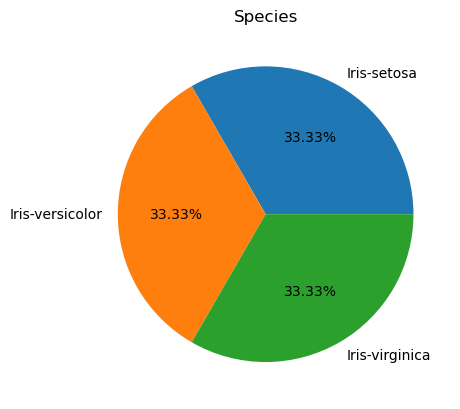

In [10]:
# see the distribution of flower species using pie chart
iris["Species"].value_counts(normalize = True).plot.pie(autopct = "%1.2f%%" ,ylabel = '', title = "Species")
plt.show()

Taregt variable have equal value count so data is balanced!!

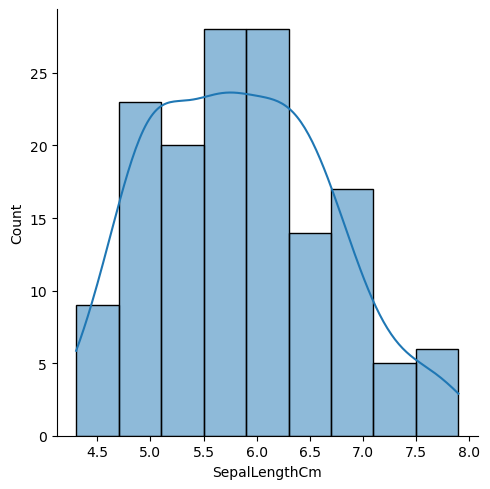

In [16]:
# plot distplot to see distribution of variable sepal length
sns.displot(data=iris, x='SepalLengthCm', label='Sepal Length', kde = True )
plt.show()

data frequency od sepal length is about to normally distributed

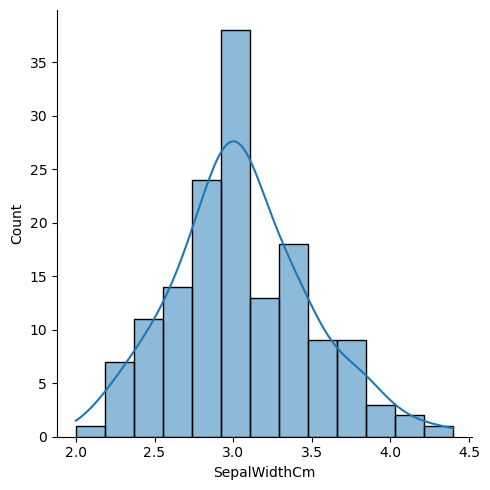

In [17]:
# plot distplot to see distribution of variable sepal width
sns.displot(data=iris, x='SepalWidthCm', label='Sepal Width', kde = True )
plt.show()

Data frequency of sepal width is normally distributed

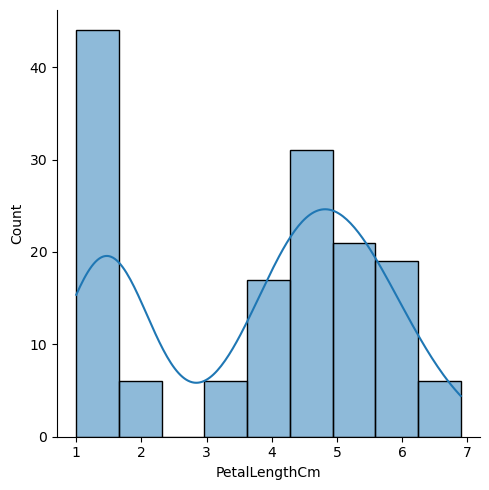

In [18]:
# plot distplot to see distribution of variable petal length
sns.displot(data=iris, x='PetalLengthCm', label='petal length', kde = True )
plt.show()

Data frequency of petal length is not normally distributed

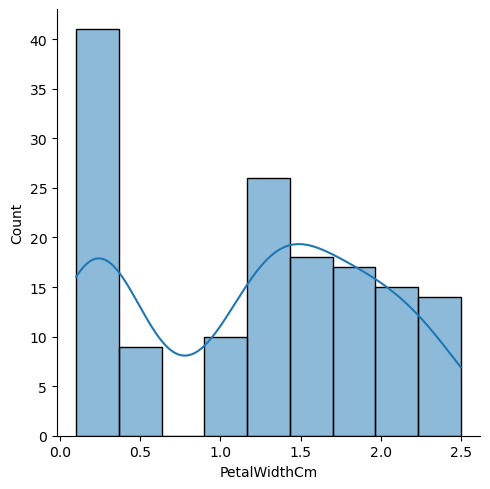

In [52]:
# plot distplot to see distribution of variable petal width
sns.displot(data=iris, x='PetalWidthCm', label='petal width', kde = True )
plt.show()

Data frequency of petal width is not normally distributed

#### Bivariate Analysis

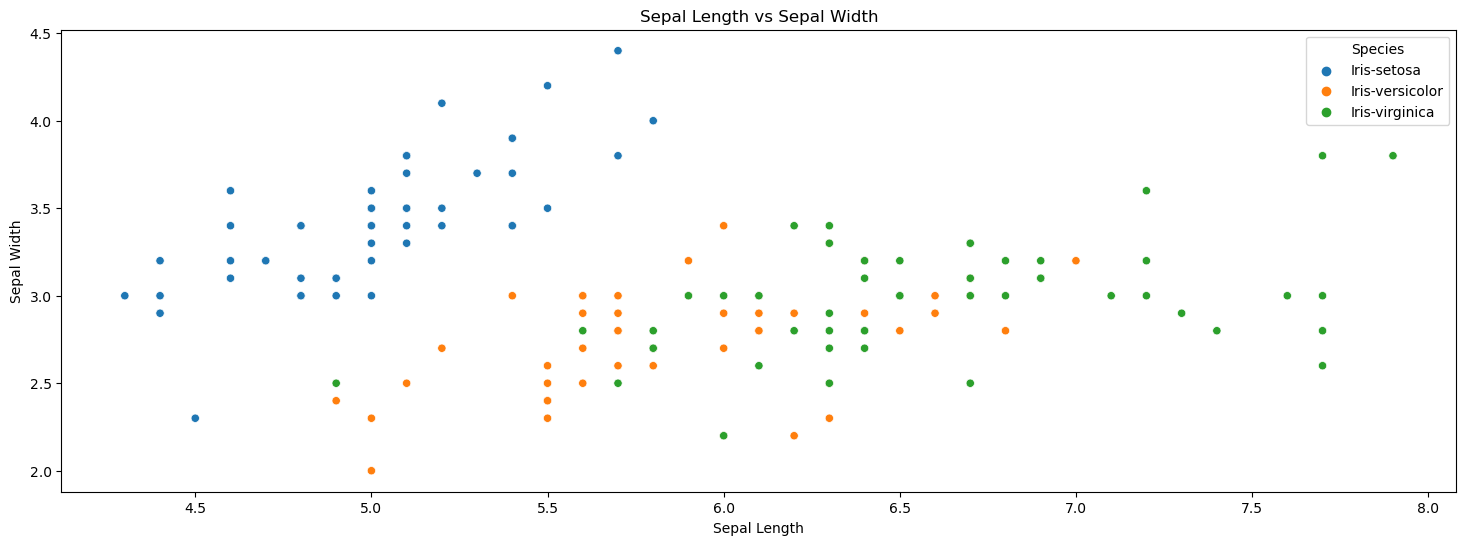

In [11]:
# plot the scatter plot to see distribution of species over sepal length vs sepal width

plt.figure(figsize=(18 , 6))
sns.scatterplot(data = iris , x = "SepalLengthCm" , y = "SepalWidthCm", hue = "Species")
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

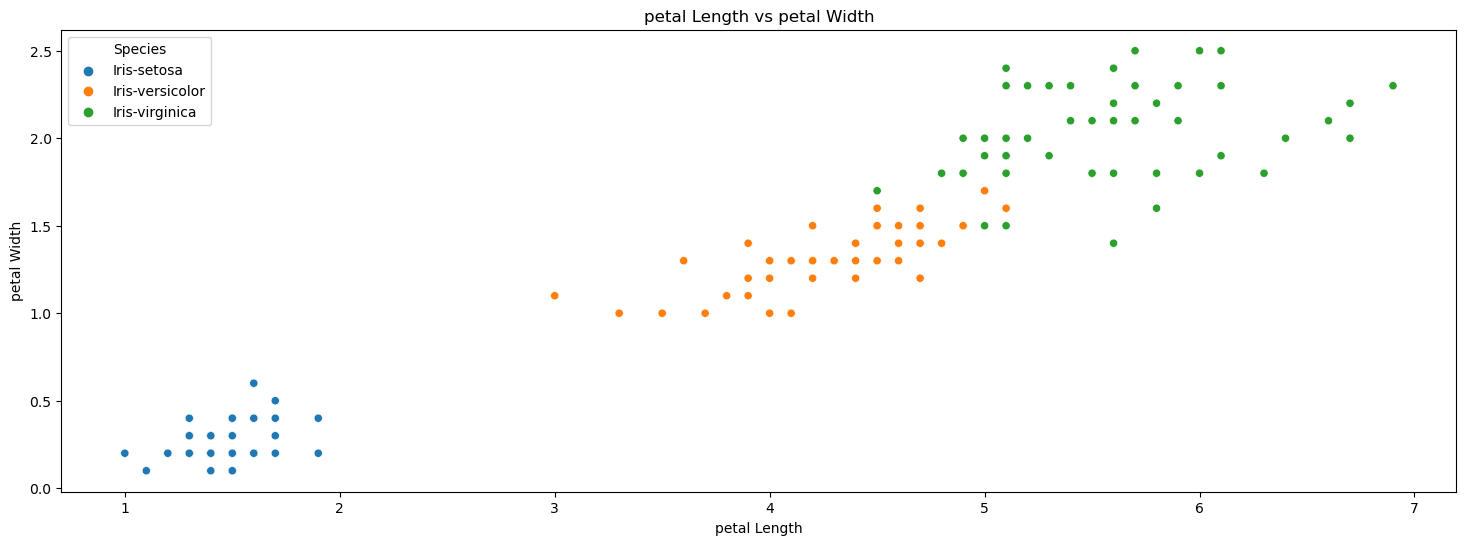

In [12]:
# plot the scatter plot to see distribution of species over petal length vs petal width

plt.figure(figsize=(18 , 6))
sns.scatterplot(data = iris , x = "PetalLengthCm" , y = "PetalWidthCm", hue = "Species")
plt.title("petal Length vs petal Width")
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.show()

### Detect outliers  

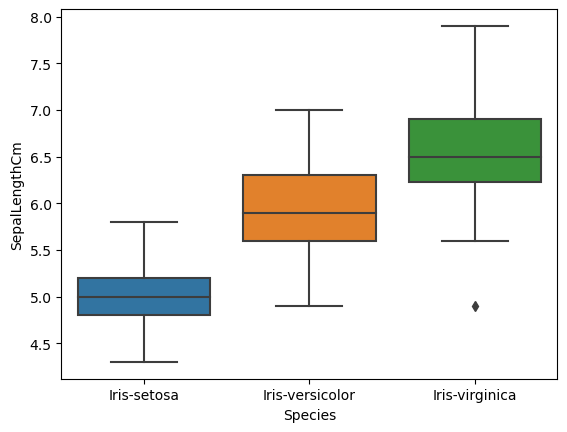

In [46]:
# check for outliers in the variable sepal length
sns.boxplot(data=iris, x= "Species", y='SepalLengthCm')
plt.show()

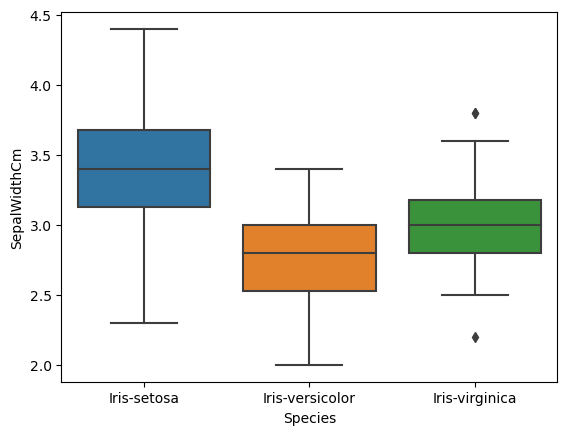

In [15]:
# check for outliers in the variable sepal width
sns.boxplot(data = iris , x= 'Species' , y = 'SepalWidthCm')
plt.show()

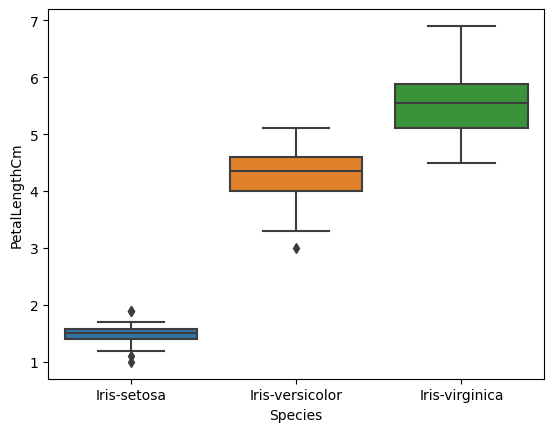

In [44]:
# check for outliers in the variable petal length
sns.boxplot(data=iris , x='Species', y='PetalLengthCm')
plt.show()

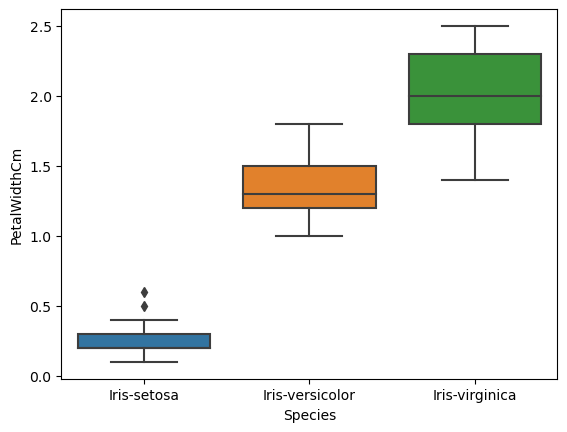

In [51]:
# check for outliers in the variable petal width
sns.boxplot(data=iris , x='Species', y='PetalWidthCm')
plt.show()

#### Multivariate Analysis

<Figure size 1500x900 with 0 Axes>

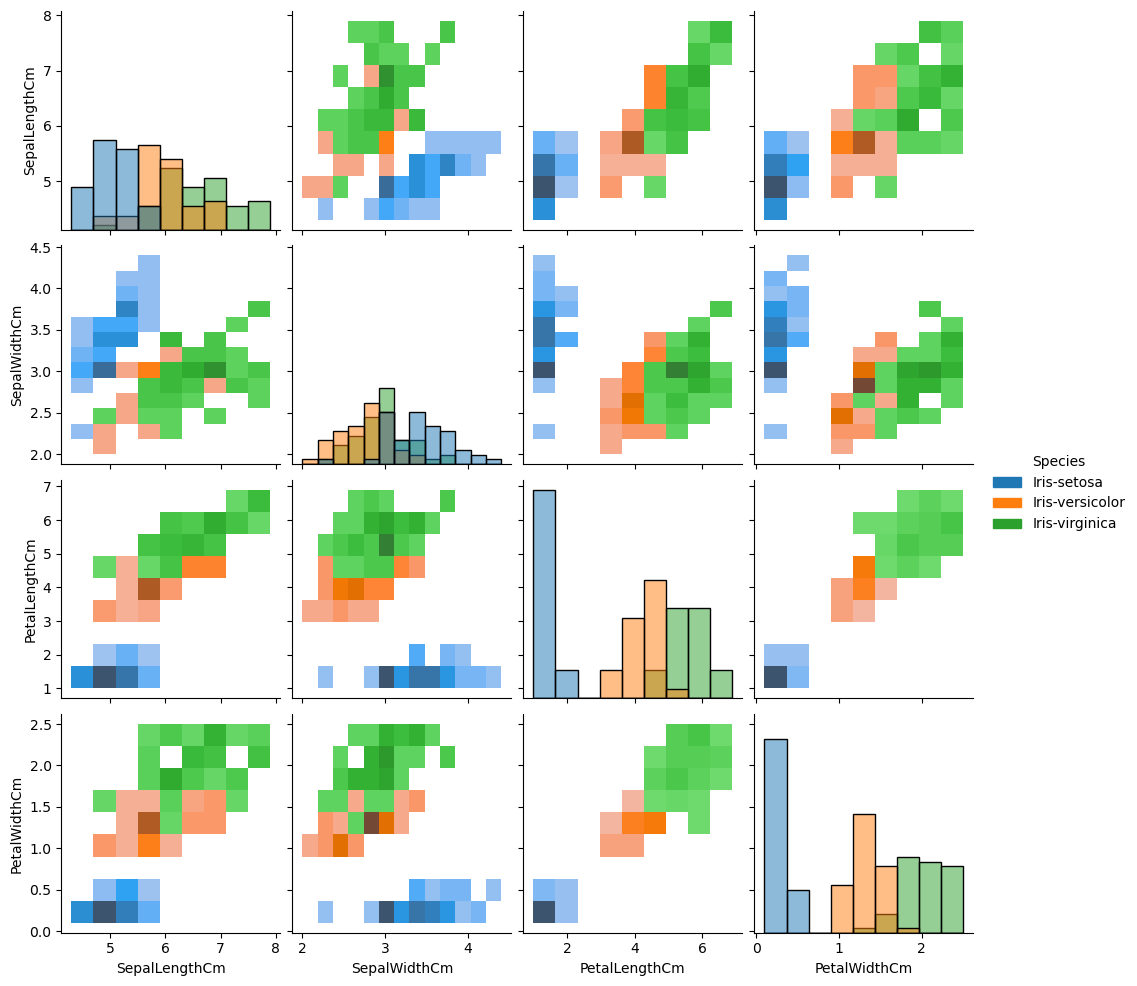

In [61]:
# plot the hisplot to see correlation between the variables
iris.drop(['Id'], axis=1, inplace=True)
plt.figure(figsize = (15 , 9))
sns.pairplot(iris, hue = "Species" , kind = "hist")
plt.show()

In [62]:
#Correlation between variables
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


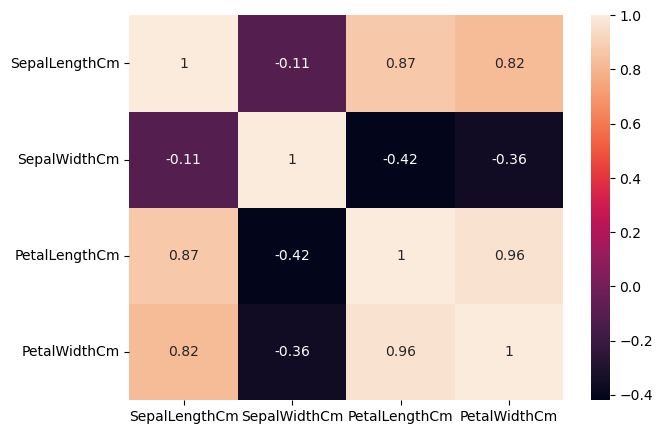

In [63]:
#Heatmap
corr = iris.corr()
fig = plt.figure(figsize=(7,5))
sns.heatmap(corr , annot = True)
plt.show()

There is good correlation between
-  Petal length and Petal Width i.e 0.96.
- Petal Length and sepal length i.e 0.87.
- Sepal length and Petal Width i.e 0.82.

## Model Selection and Evaluation 

In [65]:
#create X and y
X = iris[["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]].values
y = iris["Species"].values

In [66]:
# Split the data to train and test set

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 100)

### Logistics Regression 

In [67]:
# Calculate the logistic regression for the splitted iris data

logreg = LogisticRegression()
logreg.fit(X_train , y_train)
Y_pred = logreg.predict(X_test)
log_score = round(logreg.score(X_train,y_train)*100,2)
log_score

95.24

### Decision Tree 

In [68]:
# Calculate the Decision Tre classifier using DecisionTreeClassifier()

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score

100.0

### k-nearest neighbors (KNN) 

In [69]:
# Calculate the KNN classifier using KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score

96.19

### Support Vector Machine

In [70]:
# Calculate the support vector machine using SVC()

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
svc_score = round(svc.score(X_train, y_train) * 100, 2)
svc_score

95.24